In [1]:
library(statsr)
library(tidyverse)
library(GGally)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'tidyr' was built under R version 3.4.3"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
"package 'GGally' was built under R version 3.4.4"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [2]:
data(evals)

In [3]:
median(evals$score)

[1] 4.3

In [8]:
mean(evals$score >= 4.6)

[1] 0.2807775

In [10]:
sum(evals$score < 3)

[1] 11

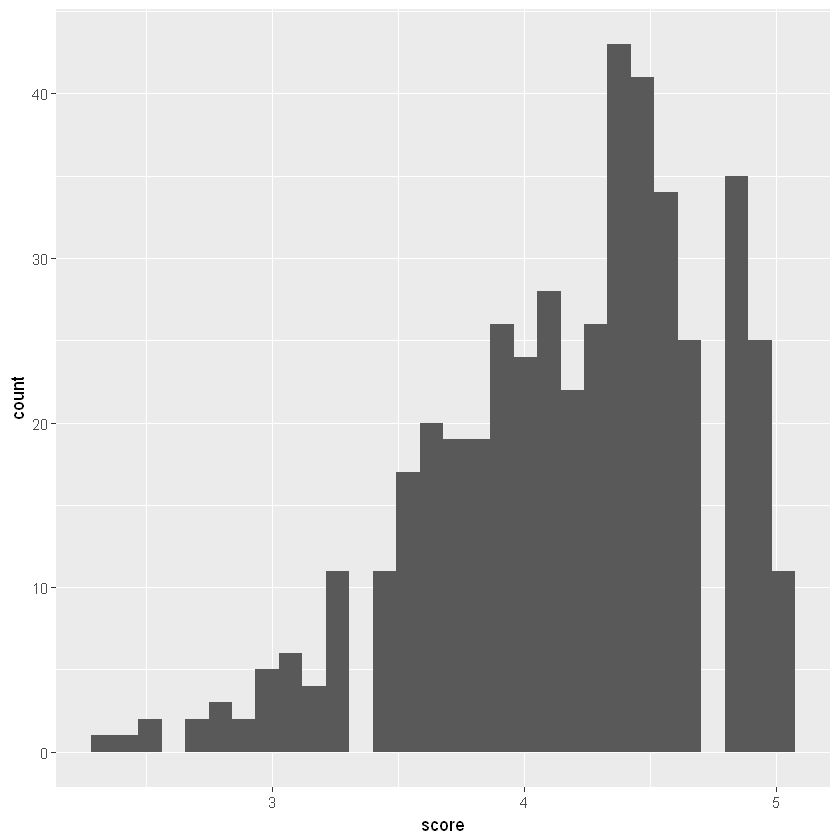

In [12]:
ggplot(evals, aes(score)) +
geom_histogram(bins = 30)

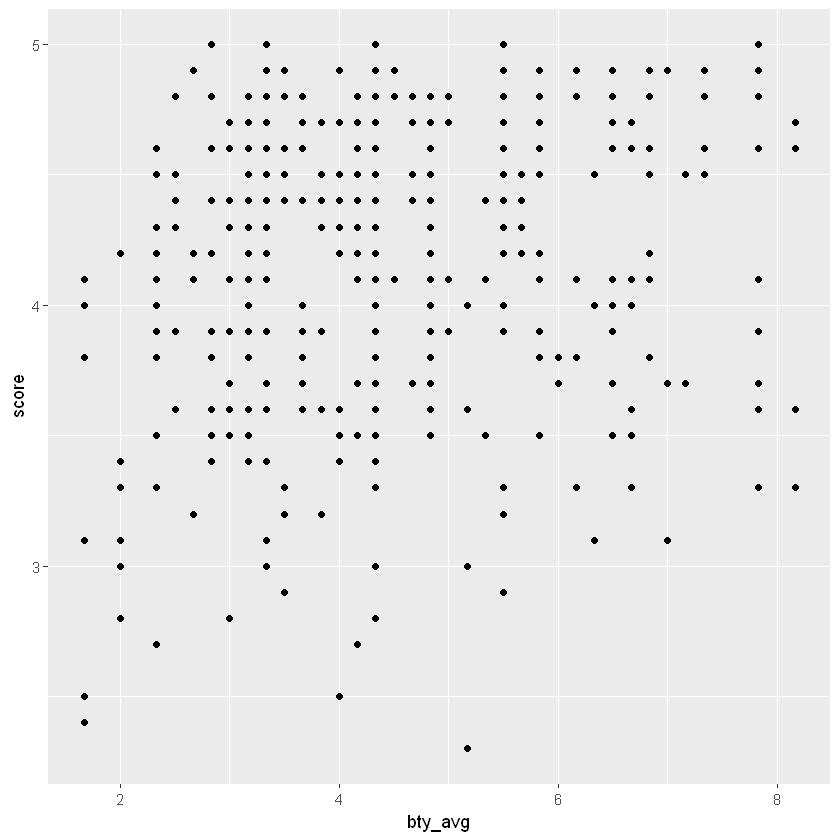

In [13]:
ggplot(evals, aes(bty_avg, score)) +
geom_point()

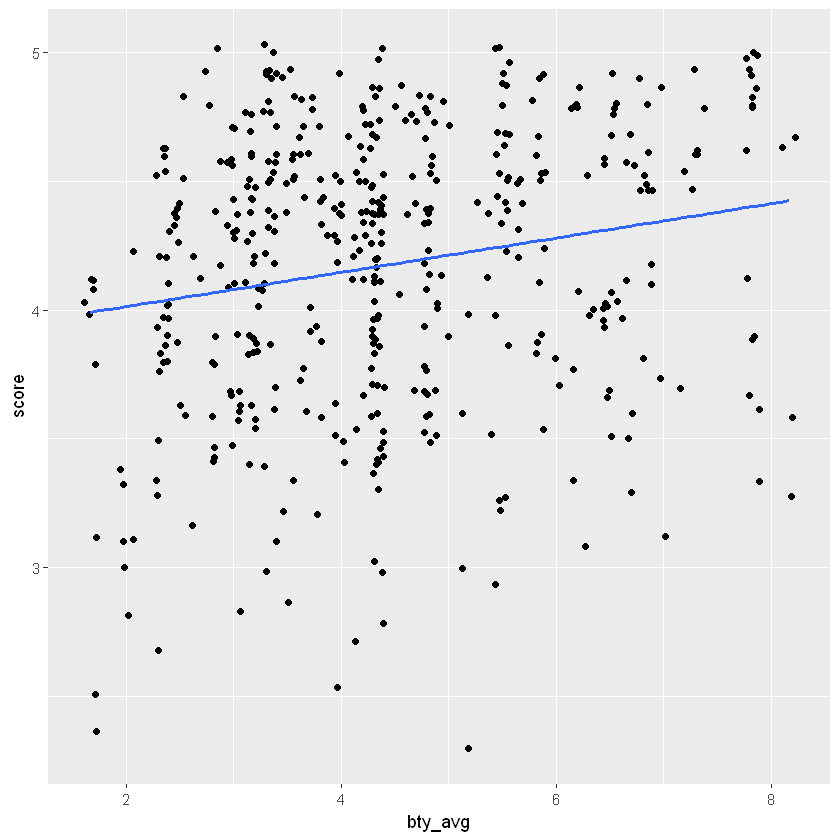

In [16]:
ggplot(evals, aes(bty_avg, score)) +
geom_jitter() +
geom_smooth(method = 'lm', se = FALSE)

In [17]:
beauty_to_score <- lm(score ~ bty_avg, data = evals)

In [18]:
summary(beauty_to_score)


Call:
lm(formula = score ~ bty_avg, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9246 -0.3690  0.1420  0.3977  0.9309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88034    0.07614   50.96  < 2e-16 ***
bty_avg      0.06664    0.01629    4.09 5.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5348 on 461 degrees of freedom
Multiple R-squared:  0.03502,	Adjusted R-squared:  0.03293 
F-statistic: 16.73 on 1 and 461 DF,  p-value: 5.083e-05


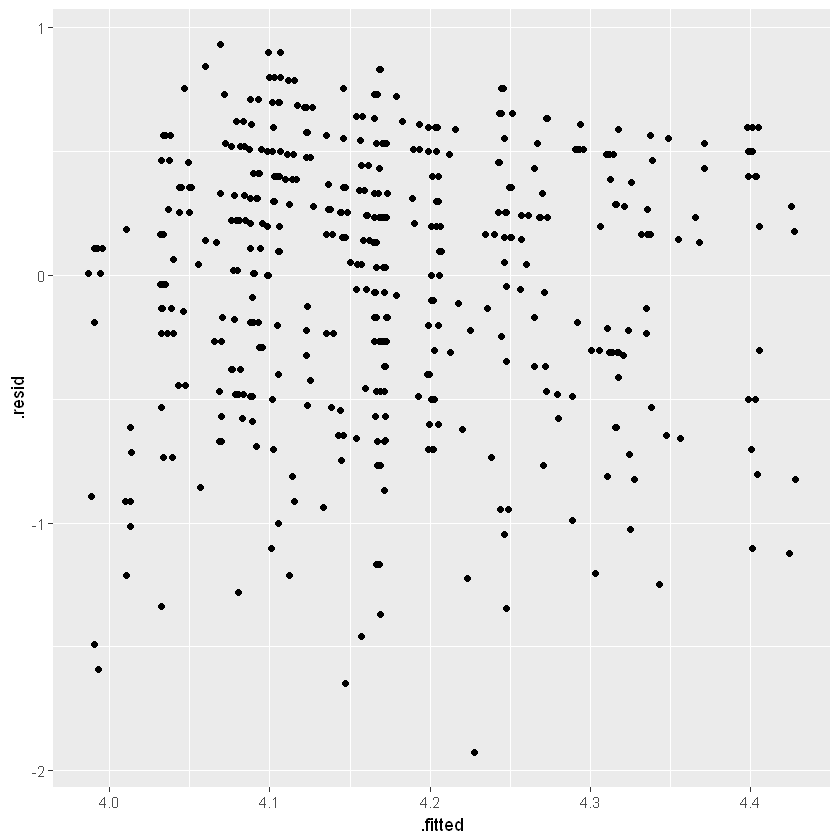

In [21]:
ggplot(beauty_to_score, aes(.fitted, .resid)) +
geom_jitter()

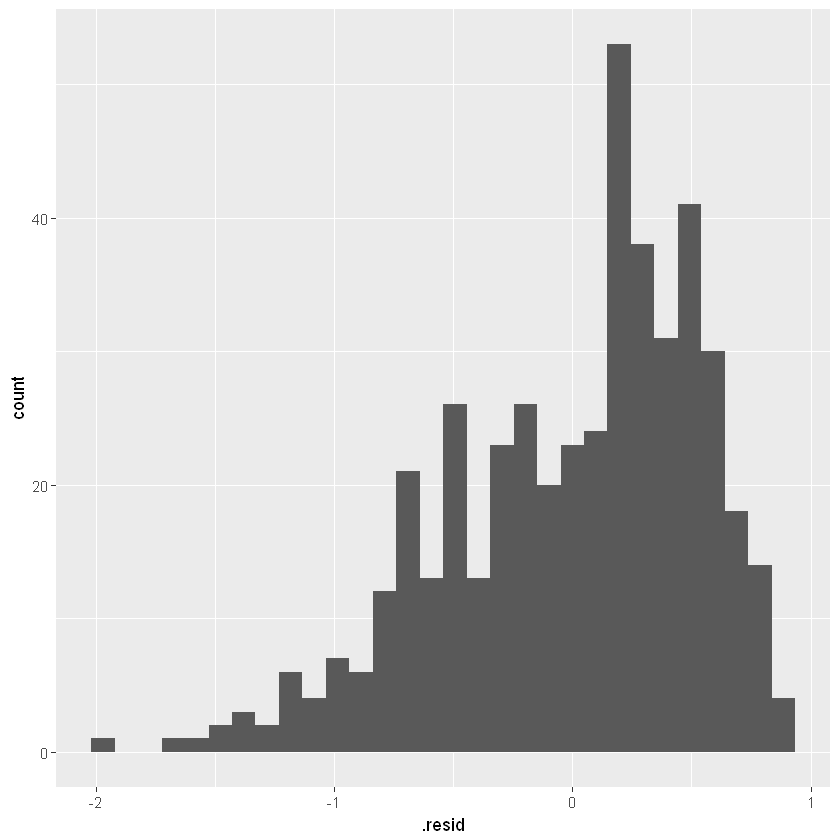

In [22]:
ggplot(beauty_to_score, aes(.resid)) +
geom_histogram(bins = 30)

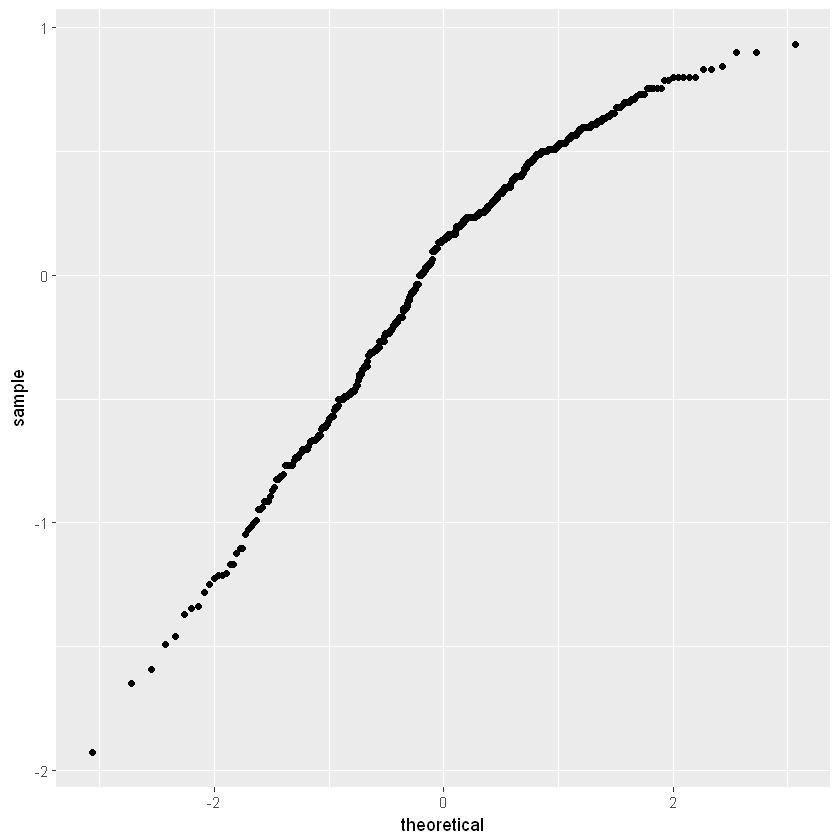

In [24]:
ggplot(beauty_to_score, aes(sample = .resid)) +
stat_qq()

In [26]:
dim(evals)

[1] 463  21

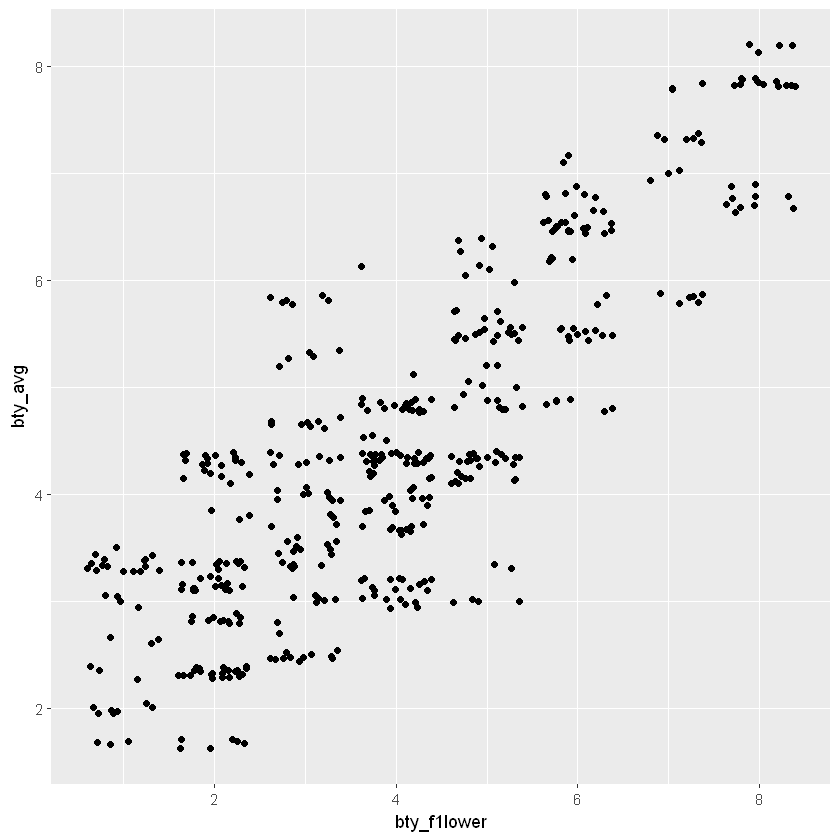

In [28]:
ggplot(evals, aes(bty_f1lower, bty_avg)) +
geom_jitter()

In [29]:
evals %>%
summarize(cor(bty_avg, bty_f1lower))

"cor(bty_avg, bty_f1lower)"
0.8439112


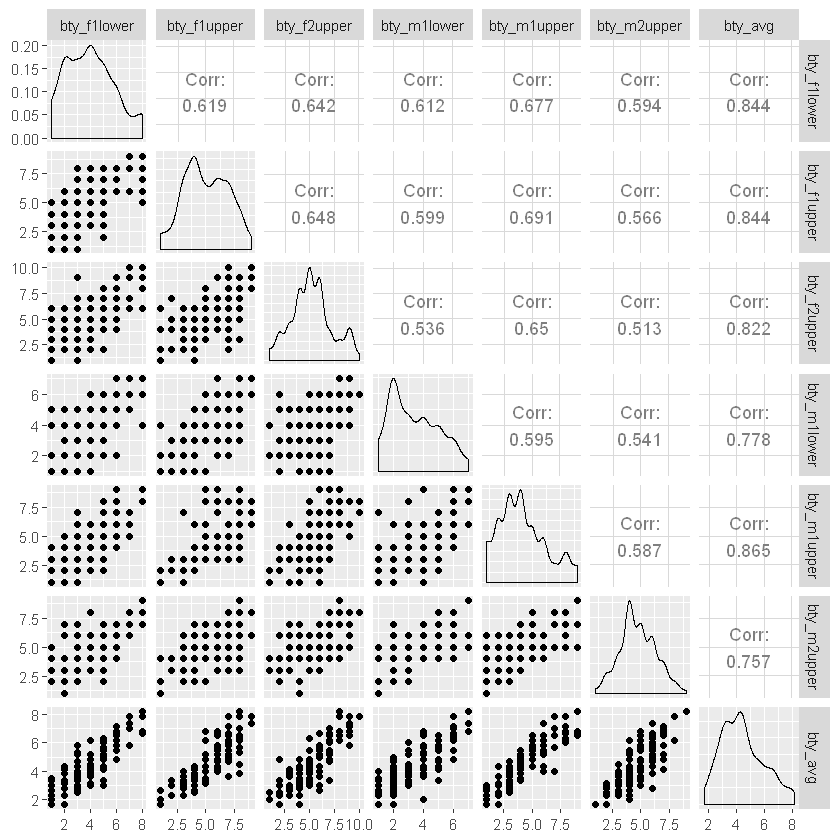

In [30]:
ggpairs(evals, columns = 13:19)

In [31]:
m_bty_gen <- lm(score ~ bty_avg + gender, data = evals)
summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + gender, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74734    0.08466  44.266  < 2e-16 ***
bty_avg      0.07416    0.01625   4.563 6.48e-06 ***
gendermale   0.17239    0.05022   3.433 0.000652 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


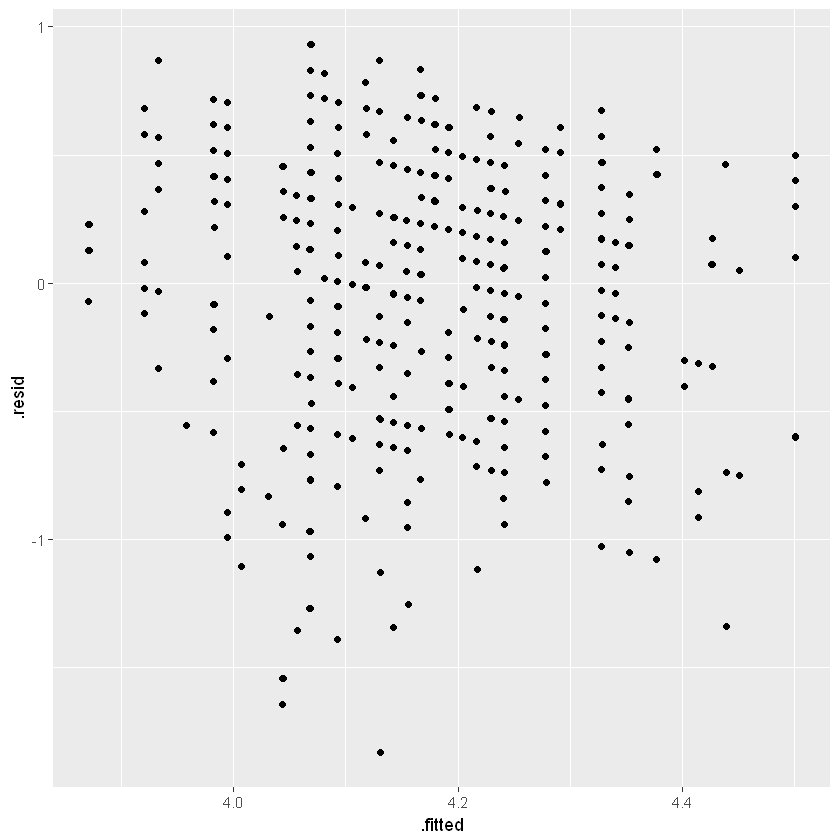

In [32]:
ggplot(m_bty_gen, aes(.fitted, .resid)) +
geom_jitter()

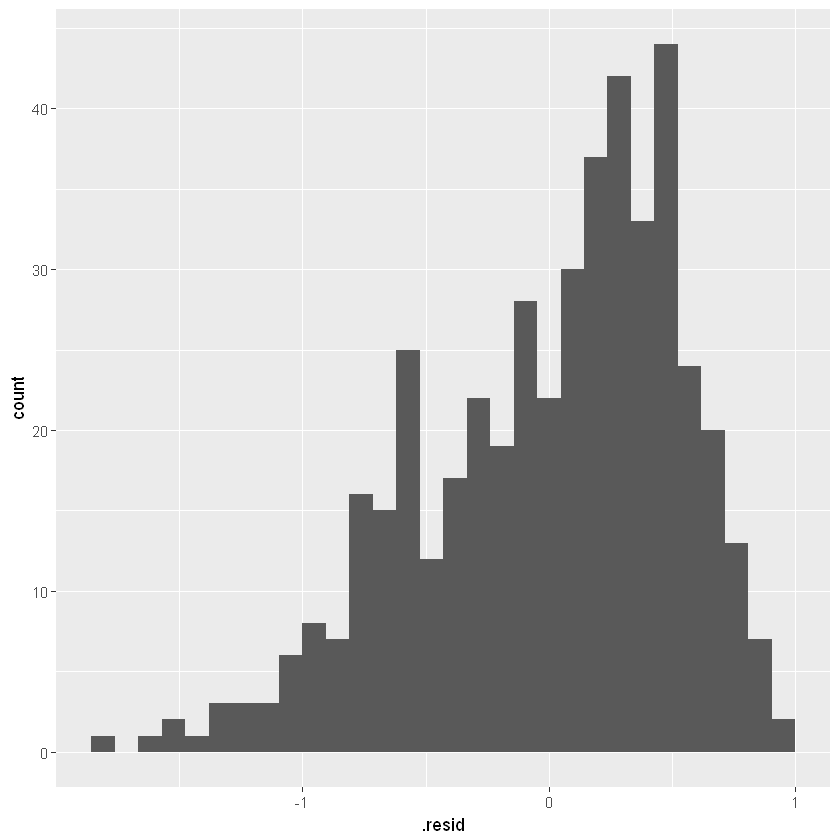

In [33]:
ggplot(m_bty_gen, aes(.resid)) +
geom_histogram(bins = 30)

In [34]:
m_bty_rank <- lm(score ~ bty_avg + rank, data = evals)
summary(m_bty_rank)


Call:
lm(formula = score ~ bty_avg + rank, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8713 -0.3642  0.1489  0.4103  0.9525 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.98155    0.09078  43.860  < 2e-16 ***
bty_avg           0.06783    0.01655   4.098 4.92e-05 ***
ranktenure track -0.16070    0.07395  -2.173   0.0303 *  
ranktenured      -0.12623    0.06266  -2.014   0.0445 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5328 on 459 degrees of freedom
Multiple R-squared:  0.04652,	Adjusted R-squared:  0.04029 
F-statistic: 7.465 on 3 and 459 DF,  p-value: 6.88e-05


In [38]:
m_full <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval 
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg 
             + pic_outfit + pic_color, data = evals)
summary(m_full)


Call:
lm(formula = score ~ rank + ethnicity + gender + language + age + 
    cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + 
    bty_avg + pic_outfit + pic_color, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77397 -0.32432  0.09067  0.35183  0.95036 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.0952141  0.2905277  14.096  < 2e-16 ***
ranktenure track      -0.1475932  0.0820671  -1.798  0.07278 .  
ranktenured           -0.0973378  0.0663296  -1.467  0.14295    
ethnicitynot minority  0.1234929  0.0786273   1.571  0.11698    
gendermale             0.2109481  0.0518230   4.071 5.54e-05 ***
languagenon-english   -0.2298112  0.1113754  -2.063  0.03965 *  
age                   -0.0090072  0.0031359  -2.872  0.00427 ** 
cls_perc_eval          0.0053272  0.0015393   3.461  0.00059 ***
cls_students           0.0004546  0.0003774   1.205  0.22896    
cls_levelupper         0.060514

In [37]:
m1 <- lm(score ~ ethnicity + gender + language + age + cls_perc_eval 
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg, data = evals)
summary(m1)$adj.r.squared

[1] 0.1417823

In [39]:
summary(lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval 
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg 
             + pic_outfit + pic_color, data = evals))$adj.r.squared

[1] 0.1617076

In [40]:
summary(lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval 
             + cls_students + cls_level + cls_profs + cls_credits +  
             + pic_outfit + pic_color, data = evals))$adj.r.squared

[1] 0.1538113

In [41]:
summary(lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval 
             + cls_students + cls_level + cls_credits + bty_avg 
             + pic_outfit + pic_color, data = evals))$adj.r.squared

[1] 0.1634262

In [42]:
summary(lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval 
             + cls_level + cls_credits + bty_avg 
             + pic_outfit + pic_color, data = evals))$adj.r.squared

[1] 0.1623604

In [43]:
summary(lm(score ~ ethnicity + gender + language + age + cls_perc_eval 
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg 
             + pic_outfit + pic_color, data = evals))$adj.r.squared

[1] 0.1587245

In [45]:
mean(evals$score > 4.6)

[1] 0.2073434